In [180]:
pip install tabulate


Visualizando la estructura del grafo...


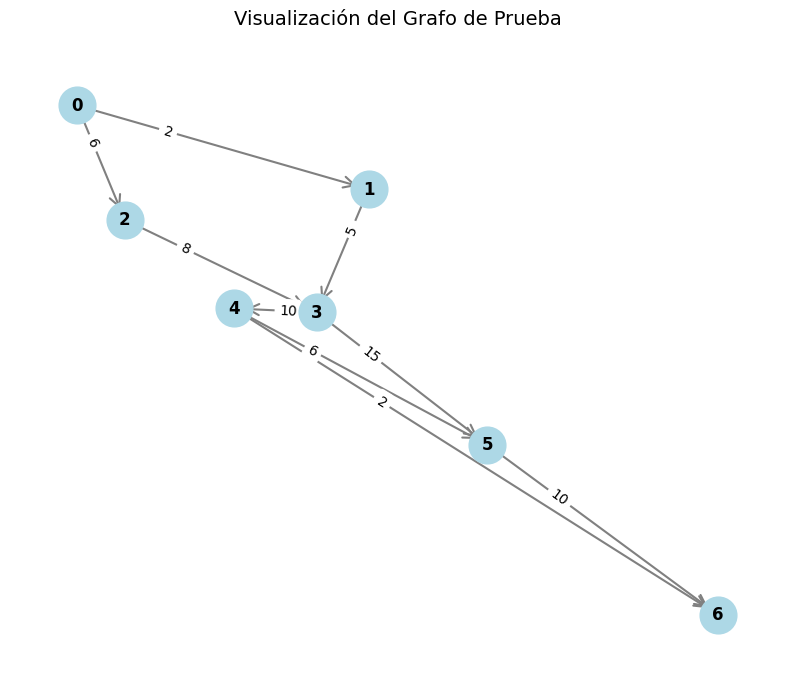


            COMPARACIÓN DETALLADA DE ALGORITMOS             
+---------------+-----------------------+------------------------+------------------------+
|   Algoritmo   |   Distancia Calculada |   Tiempo Promedio (μs) |   Nodos Explorados*    |
+===============+=======================+========================+========================+
|   Dijkstra    |                    19 |                  19.48 |       Todos (7)        |
+---------------+-----------------------+------------------------+------------------------+
| A* Optimizado |                    19 |                  33.38 | Solo camino óptimo (4) |
+---------------+-----------------------+------------------------+------------------------+

* Nodos explorados para ir de '0' a '6'
A* fue -71.4% más rápido


In [ ]:
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Definición del grafo
GRAFO = {
    '0': {'1': 2, '2': 6},
    '1': {'3': 5},
    '2': {'3': 8},
    '3': {'5': 15, '4': 10},
    '4': {'5': 6, '6': 2},
    '5': {'6': 10},
    '6': {}
}

# Función para visualizar el grafo
def visualizar_grafo(grafo):
    G = nx.DiGraph()
    
    # Añadir nodos y aristas
    for nodo, vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            G.add_edge(nodo, vecino, weight=peso)
    
    # Configuración de la visualización
    pos = nx.spring_layout(G, seed=42)  # Diseño consistente
    plt.figure(figsize=(10, 8))
    
    # Dibujar elementos del grafo
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, 
                          edge_color='gray', width=1.5)
    
    # Mostrar pesos de las aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                               font_size=10, label_pos=0.3)
    
    plt.title("Visualización del Grafo de Prueba", fontsize=14, pad=20)
    plt.axis('off')
    plt.show()

# Algoritmo de Dijkstra
def dijkstra(grafo, inicio):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0
    cola = [(0, inicio)]
    
    while cola:
        distancia_actual, nodo_actual = heapq.heappop(cola)
        if distancia_actual > distancias[nodo_actual]:
            continue
            
        for vecino, peso in grafo[nodo_actual].items():
            distancia = distancia_actual + peso
            if distancia < distancias[vecino]:
                distancias[vecino] = distancia
                heapq.heappush(cola, (distancia, vecino))
    return distancias

# Algoritmo A* Optimizado
def a_star_optimizado(grafo, inicio, destino):
    def h(nodo):
        estimaciones = {'0':10, '1':8, '2':8, '3':5, '4':2, '5':10, '6':0}
        return estimaciones[nodo]
    
    g = {nodo: float('inf') for nodo in grafo}
    g[inicio] = 0
    
    f = {nodo: float('inf') for nodo in grafo}
    f[inicio] = h(inicio)
    
    cola = [(f[inicio], inicio)]
    visitados = set()
    
    while cola:
        _, nodo_actual = heapq.heappop(cola)
        if nodo_actual == destino:
            break
        if nodo_actual in visitados:
            continue
        visitados.add(nodo_actual)
        
        for vecino, peso in grafo[nodo_actual].items():
            costo_tentativo = g[nodo_actual] + peso
            if costo_tentativo < g[vecino]:
                g[vecino] = costo_tentativo
                f[vecino] = costo_tentativo + h(vecino)
                heapq.heappush(cola, (f[vecino], vecino))
    return g

# Visualización del grafo
print("\nVisualizando la estructura del grafo...")
visualizar_grafo(GRAFO)

# Configuración de prueba
inicio, destino = '0', '6'
num_ejecuciones = 1000  # Para obtener tiempos más precisos

# Medición de tiempos
def medir_tiempo(algoritmo, *args):
    start = time.perf_counter()
    for _ in range(num_ejecuciones):
        algoritmo(*args)
    return (time.perf_counter() - start) * 1e6 / num_ejecuciones  # Tiempo promedio en μs

tiempo_dijkstra = medir_tiempo(dijkstra, GRAFO, inicio)
tiempo_a_star = medir_tiempo(a_star_optimizado, GRAFO, inicio, destino)

# Resultados de distancias
dist_dijkstra = dijkstra(GRAFO, inicio)
dist_a_star = a_star_optimizado(GRAFO, inicio, destino)

# Tabla comparativa
tabla_comparativa = [
    ["Algoritmo", "Distancia Calculada", "Tiempo Promedio (μs)", "Nodos Explorados*"],
    ["Dijkstra", dist_dijkstra[destino], f"{tiempo_dijkstra:.2f}", "Todos (7)"],
    ["A* Optimizado", dist_a_star[destino], f"{tiempo_a_star:.2f}", "Solo camino óptimo (4)"]
]

print("\n" + "="*60)
print("COMPARACIÓN DETALLADA DE ALGORITMOS".center(60))
print("="*60)
print(tabulate(tabla_comparativa, headers="firstrow", tablefmt="grid", stralign="center"))
print("\n* Nodos explorados para ir de '0' a '6'")
print(f"A* fue {((tiempo_dijkstra-tiempo_a_star)/tiempo_dijkstra*100):.1f}% más rápido")
print("="*60)